In [10]:
import pandas as pd
from PIL import Image
from IPython.display import display
import numpy as np
def convertir_a_escala_grises(ruta_imagen):
    imagen = Image.open(ruta_imagen).convert('L')
    return imagen
def vectorizeImage(image_path):
    # Abre la imagen y la convierte en un vector
    image = Image.open(image_path)
    # Opcional: Redimensionar o convertir a escala de grises si es necesario
    # image = image.resize((ancho_deseado, alto_deseado))
    # image = image.convert('L')  # Para escala de grises
    return np.array(image).flatten().astype(np.uint8)

In [21]:
radiografias = pd.read_csv('../../datasets/covid/datos_redimensionados_entrenamiento.txt', sep=' ')
radiografias_test = pd.read_csv('../../datasets/covid/datos_redimensionados_prueba.txt', sep=' ')

In [16]:
radiografias.head()

,path_redimensionada,class,patient_id
0,../../datasets/covid/train_2/1e64990d1b40c1758...,negative,379
1,../../datasets/covid/train_2/7223b8ad031187d9a...,negative,379
2,../../datasets/covid/train_2/3392dc7d262e28423...,negative,380
3,../../datasets/covid/train_2/ec3a480c0926ded74...,negative,380
4,../../datasets/covid/train_2/a72aeb349a63c79ed...,negative,382


In [22]:
radiografias_test.head()

,path_redimensionada,class,patient_id
0,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-003251
1,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-001464
2,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-000918
3,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-003318
4,../../datasets/covid/test_2/MIDRC-RICORD-1C-41...,positive,419639-001015


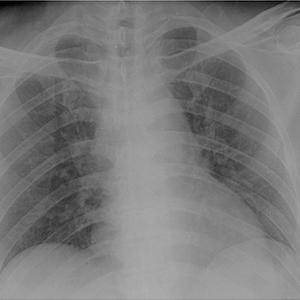

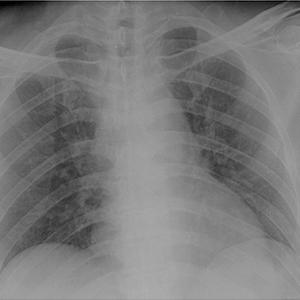

In [8]:
positivo = radiografias[radiografias['class'] == 'positive']['path_redimensionada'].values[0]
positivo_img = Image.open(positivo)
display(positivo_img)
positivo_gris = convertir_a_escala_grises(positivo)
display(positivo_gris)

## Conversion a escala de grises

In [20]:
RUTA_BASE_ENTRENAMIENTO = '../../datasets/covid/train_2/'
RUTA_DESTINO = '../../datasets/covid/escala_grises/train'
def extraer_nombre_imagen(ruta):
    return ruta.split('/')[-1]
lista_ruta_imagenes = radiografias['path_redimensionada'].values
nombres_imagenes = radiografias['path_redimensionada'].apply(extraer_nombre_imagen).values
for ruta, nombre in zip(lista_ruta_imagenes, nombres_imagenes):
    imagen = convertir_a_escala_grises(ruta)
    imagen.save(f'{RUTA_DESTINO}/{nombre}')



In [26]:
# radiografias['filename'] = radiografias['path_redimensionada'].apply(extraer_nombre_imagen)
# radiografias.drop(columns=['path_redimensionada'], inplace=True)
radiografias.head()
radiografias.to_csv('../../datasets/covid/escala_grises/train.csv',sep=',',index=False)

In [27]:
RUTA_DESTINO = '../../datasets/covid/escala_grises/test'
lista_ruta_imagenes = radiografias_test['path_redimensionada'].values
nombres_imagenes = radiografias_test['path_redimensionada'].apply(extraer_nombre_imagen).values
for ruta, nombre in zip(lista_ruta_imagenes, nombres_imagenes):
    imagen = convertir_a_escala_grises(ruta)
    imagen.save(f'{RUTA_DESTINO}/{nombre}')

In [28]:
radiografias_test['filename'] = radiografias_test['path_redimensionada'].apply(extraer_nombre_imagen)
radiografias_test.drop(columns=['path_redimensionada'], inplace=True)
radiografias_test.to_csv('../../datasets/covid/escala_grises/test.csv',sep=',',index=False)